In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### [Q1 10 points] Classify green from red

![splotches](splotches.png)

Consider the above classification problem. For each question below, answer using a percentage or a fraction, and give a brief justification. You may assume that each splotch has the same number of points.

#### (a) What accuracy can a decision tree get on this data?

100% - The decision tree could get 100% but would have to split multiple times both vertically and horizontally making the tree very deep. The first split could either be on either the x or y-axis around +/- 5 splitting the plot in roughly 2/3rds. Then the tree would split based on the groupings of the 2 reds and 2 greens based on both features to classify at around +/- 5 on each axis or for each feature. 

#### (b) What accuracy can logistic regression get on this data?

5/8 - The logistic regression cannot make one single split that would get everything correct. The best option is either a linear vertical line around +/- 5 or a linear horizontal line around +/- 5. Either case results in getting 5/8th of the options correct by classifying red or green for either side of the line depending on the split. So if you were to do a linear separator at around +5 on the x-axis, the right side would choose green, and the left side would choose red for classification becuase there are more green on the right and more red of the left.

---
The **Collisions** dataset contains 30K accident reports.
* It lists the BOROUGH, ZIP CODE, LATITUDE, and LONGITUDE of the accident.
* It also provides the street name (ON STREET NAME), and the cross street if applicable (CROSS STREET NAME).
* It provides counts of the number of cyclists/pedestrians/motorists that were injured or killed. These are also fields for "NUMBER OF PERSONS INJURED" and "NUMBER OF PERSONS KILLED."
* It provides the types of vehicles, and the factors that contributed to the accident. It allows for up to 5-vehicle collisions, so there are 5 vehicle-type fields and 5 contributing-factor fields.

In [2]:
df = pd.read_csv('Collisions.csv', dtype={'ZIP CODE':'str', 'ON STREET NAME':'str'}, parse_dates=['Date'])

### [Q2 3 points] Print out the first row of the dataframe

In [3]:
print df.iloc[0]

Date                                          2018-05-01 00:00:00
BOROUGH                                                     BRONX
ZIP CODE                                                    10473
LATITUDE                                                  40.8256
LONGITUDE                                                -73.8649
LOCATION                                   (40.825596, -73.86492)
ON STREET NAME                   BRUCKNER BOULEVARD              
CROSS STREET NAME                                    BEACH AVENUE
OFF STREET NAME                                               NaN
NUMBER OF PERSONS INJURED                                       0
NUMBER OF PERSONS KILLED                                        0
NUMBER OF PEDESTRIANS INJURED                                   0
NUMBER OF PEDESTRIANS KILLED                                    0
NUMBER OF CYCLIST INJURED                                       0
NUMBER OF CYCLIST KILLED                                        0
NUMBER OF 

### [Q3 3 points] Set the index of the dataframe to the Date column.

Make sure the dataframe is properly modified, and you don't just change a copy!

In [4]:
df.set_index('Date', inplace=True)

### [Q4 5 points] For how many accidents is the NUMBER OF PERSONS INJURED _not equal to_ the sum of NUMBER OF PEDESTRIANS INJURED, NUMBER OF CYCLIST INJURED, and NUMBER OF MOTORIST INJURED?

In [5]:
# Get the sum of injured
df['totalInjured'] = df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF MOTORIST INJURED']

# Create a mask and compare the number of injuries
mask_injured = (df['NUMBER OF PERSONS INJURED'] != df['totalInjured'])
df_notEqual = df[mask_injured]

# Print the number of rows in the new df
print len(df_notEqual)

25


### [Q5 5 points] What's the maximum number of people injured+killed in any one accident?

You only need to consider the NUMBER OF PERSONS INJURED and NUMBER OF PERSONS KILLED fields.

In [6]:
# Create a new column for max injured and killed
df['maxPeople'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']

print df['maxPeople'].max()

22


### [Q6 5 points] For each BOROUGH, find the ON STREET NAME with the most accidents.

In [7]:
# Groupby the boro and find the idxmax
print df.groupby(['BOROUGH', 'ON STREET NAME'])[['ON STREET NAME']].count().unstack('BOROUGH').idxmax()

                BOROUGH      
ON STREET NAME  BRONX            BRUCKNER BOULEVARD              
                BROOKLYN         ATLANTIC AVENUE                 
                MANHATTAN        2 AVENUE                        
                QUEENS           NORTHERN BOULEVARD              
                STATEN ISLAND    HYLAN BOULEVARD                 
dtype: object


### [Q7 5 points] For each unique VEHICLE TYPE CODE 1, count the number of times a vehicle of that type hit another another vehicle of the same type (VEHICLE TYPE CODE 2).

It's okay to leave "van," "Van," and "VAN" as separate vehicles.

In [8]:
# Create a mask for where the vehicles codes type 1 & 2 match
mask_code = (df['VEHICLE TYPE CODE 1'] == df['VEHICLE TYPE CODE 2'])
df_match = df[mask_code]
print len(df_match)

9006


### [Q8 6 points] How many ON STREET NAMEs show up with multiple ZIP CODEs?

In [9]:
# Drop the duplicate ON STREET NAMEs and ZIPCODE
df_8 = df[['ON STREET NAME', 'ZIP CODE']]
print len(df_8.drop_duplicates(['ON STREET NAME', 'ZIP CODE']))

6356


### [Q9 6 points] Plot the frequencies of the top 10 most common CONTRIBUTING FACTOR VEHICLE 1.

Get rid of any "Unspecified" in the plot.

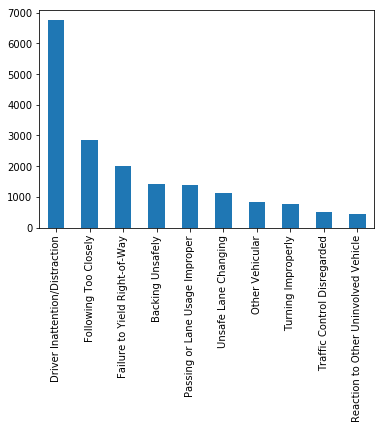

In [10]:
# Mask the unspecified and take the value counts
mask_unspecified = (df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified')
df[mask_unspecified]['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:10].plot(kind='bar')

### [Q10 6 points] Find the ON STREET NAMEs that appear in more than 3 BOROUGHs.

Ignore situations where the BOROUGH or ON STREET NAME is missing.

In [11]:
# Groupby the boro and street name
df_10 = df.groupby(['BOROUGH', 'ON STREET NAME'])[['ON STREET NAME']].count().unstack('ON STREET NAME')


def count(s):
    '''Takes in a series and returns if the count > 3'''
    return s.count() > 3

mask_3boros = df_10.apply(count)

print df_10.T[mask_3boros].loc['ON STREET NAME']

BOROUGH                           BRONX  BROOKLYN  MANHATTAN  QUEENS  \
ON STREET NAME                                                         
BROADWAY                           10.0      27.0       90.0    24.0   
FRANKLIN AVENUE                     1.0       6.0        NaN     5.0   
PRINCE STREET                       NaN       2.0        2.0     4.0   

BOROUGH                           STATEN ISLAND  
ON STREET NAME                                   
BROADWAY                                    8.0  
FRANKLIN AVENUE                             1.0  
PRINCE STREET                               1.0  


### [Q11 6 points] Plot the average number of persons injured per accident over each day, for all days in March, April, and May, 2018.

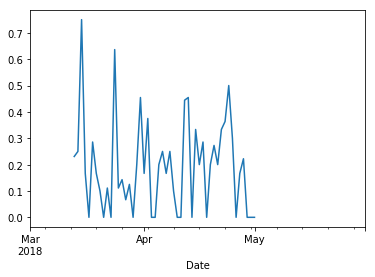

In [12]:
# Get the data for only those months
dates = pd.date_range(start='3/1/2018',end='5/31/2018',freq='D')

# Resample the data and take the mean
df.loc[dates]['NUMBER OF PERSONS INJURED'].resample('D', kind='period').mean().plot()

### [Q12 8 points] Plot accident locations, color-coded by BOROUGH.

Show a scatter plot of all accident locations (x-axis is LONGITUDE, y-axis is LATITUDE). 

* Each point should be color coded by the BOROUGH in which the accident occurred. For instance, you can use the following coding scheme: BRONX:0, MANHATTAN:1, QUEENS:2, STATEN ISLAN:3, BROOKLYN:4.
* Only plot locations where LATITUDE is between 35 and 45, LONGITUDE is between -70 and -75, and BOROUGH is not missing.
* You can use the colormap 'tab20'

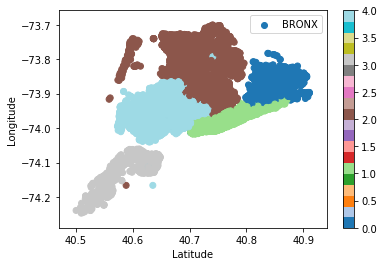

In [13]:
# Create a mask for the lat and longs
mask_lat_long = ((df['LATITUDE'] >= 35) & (df['LATITUDE'] <= 45) & (df['LONGITUDE'] >= -75) & (df['LONGITUDE'] <= -70))
df_12 = df[mask_lat_long]

# Drop missing boros
df_12 = df_12.dropna(subset=['BOROUGH'])

# Color code
code = {'BRONX':0, 'MANHATTAN':1, 'QUEENS':2, 'STATEN ISLAND':3, 'BROOKLYN':4}
def colorCode(e):
        return code[e]

df_12['color'] = df_12['BOROUGH'].map(colorCode)

scatter(df_12['LATITUDE'], df_12['LONGITUDE'], c=df_12['color'], cmap='tab20')
xlabel('Latitude')
ylabel('Longitude')

# Create a lenged based on the color coded inputes
# Tried to do handles and lables for the legened() function but was unable to get it to work
legend(['BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BROOKLYN'])
colorbar()

### [Q13 8 points] Ratio of injured pedestrians to injured cyclists, for each BOROUGH.

For each BOROUGH, find the ratio of total pedetrians injured to total cyclists injured. Lists the BOROUGHS and their ratios, in descending order of ratio.

In [14]:
# Group by the boro
df_13 = df
df_13 = df_13.groupby('BOROUGH')[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED']].sum()

# Add a ratio column
df_13['ratio'] = df_13['NUMBER OF PEDESTRIANS INJURED'] / df_13['NUMBER OF CYCLIST INJURED']

# Print in decsending order
print df_13['ratio'].sort_values(ascending=False)

BOROUGH
BRONX            4.588235
QUEENS           4.137931
STATEN ISLAND    3.333333
BROOKLYN         2.701613
MANHATTAN        2.017544
Name: ratio, dtype: float64


---
We're gonna play chess.

Okay, only one specific endgame in chess, where the "White" player has a "King" and a "Rook", while the "Black" player has a "King" and a "Pawn" (we don't need to understand all this to answer the questions). 

The KingRookVersusKingPawn.csv dataset has 37 fields. The first 36 fields check whether the board position matches 36 different special characteristics. For instance, "Posn 0" can have values 'f' or 't'. (I have no idea what these positions mean, or what their values mean. We don't care.)

The 37th field is the Result: whether the White player can win ("won"), or there is no way for White to win ("nowin").

In [15]:
df = pd.read_csv('KingRookVersusKingPawn.csv')
df[:5]

,Posn 0,Posn 1,Posn 2,Posn 3,Posn 4,Posn 5,Posn 6,Posn 7,Posn 8,Posn 9,...,Posn 27,Posn 28,Posn 29,Posn 30,Posn 31,Posn 32,Posn 33,Posn 34,Posn 35,Result
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


### [Q14 5 points] For each column, print the difference in frequencies of the most frequent value to the least frequent value.

For example, under "Posn 1", there are 2971 instances of 'f' and 225 instances of 't', so for Posn 1 we want to output 2971 - 225 = 2746.

In [16]:
def freq(s):
    '''S is a series and returns the range of the values in that series'''
    series_vc = s.value_counts()
    return series_vc.max() - series_vc.min()

df_14 = df
freqs = df_14.apply(freq)
freqs

Posn 0     2482
Posn 1     2746
Posn 2     2956
Posn 3     2552
Posn 4     1062
Posn 5      248
Posn 6      856
Posn 7     1804
Posn 8      764
Posn 9     1254
Posn 10     438
Posn 11    2524
Posn 12    1214
Posn 13    3166
Posn 14    2302
Posn 15    2884
Posn 16    3002
Posn 17    1196
Posn 18    3144
Posn 19    2232
Posn 20    2028
Posn 21    1916
Posn 22    2830
Posn 23     754
Posn 24    3174
Posn 25    1236
Posn 26    2846
Posn 27    3194
Posn 28    3102
Posn 29    2924
Posn 30    2066
Posn 31    2846
Posn 32     772
Posn 33     818
Posn 34    1494
Posn 35    1618
Result      142
dtype: int64

### [Q15 5 points] Create a column named 'target' that is 1 if the Result is 'won', and 0 otherwise.

In [17]:
# Create a mask for won
mask_win = (df['Result'] == 'won')

# Add the target values
df['target'] = 0.0
df.loc[mask_win, 'target'] = 1.0

# Print the results
print df[['Result', 'target']][:5]

  Result  target
0    won     1.0
1    won     1.0
2    won     1.0
3    won     1.0
4    won     1.0


### [Q16 4 points] What is the baseline classification accuracy?

In [18]:
# Get the value counts for target
vc_target = df['target'].value_counts()

# Get the baseline
baseline = float(vc_target.max()) / float(vc_target.sum())
print 'Baseline: ' + str(baseline)

Baseline: 0.522215269086


### [Q17 10 points] Classify the target using all the Posn features via logistic regression.

* There are 36 features: "Posn 0", "Posn 1", ..., "Posn 35". I have no idea what they mean.
* Split the data into a training set containing 70% of the rows, and a test set with the remaining 30%.
* Build a logistic regression classifier using the training set.
* Output its classification accuracy on the training set and on the test set.

In [19]:
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create the formula
formula = 'target ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in df.columns.values[:len(df.columns.values) - 2]]))

# Get the design matrices
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Build the model
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Test on the training data
prediction_train = model.predict(X_train)
print 'Train Prediction: ' + str(metrics.accuracy_score(y_train, prediction_train))

# Test on the testing data
prediction_test = model.predict(X_test)
print 'Test Prediction: ' + str(metrics.accuracy_score(y_test, prediction_test))

Train Prediction: 0.96334376397
Test Prediction: 0.959332638165
